# Using MobileNet to classify traffic signs

We will use [MobileNet](https://arxiv.org/abs/1704.04861) and fine-tune it to correctly classify a dataset of traffic signs.

MobileNet is a small CNN originaly developed for mobile phones and other small devices to be fast and lightweight.

--------------------

Load necessary packages and libraries

In [1]:
import keras
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.utils import get_file, load_img, img_to_array
import numpy as np
from IPython.display import Image

Load MobileNet

In [2]:
mobile = keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [3]:
def prepare_image(file):
    img = load_img(file, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

## Testing MobileNet on dog images

Let's try some tests on images of different dog breeds

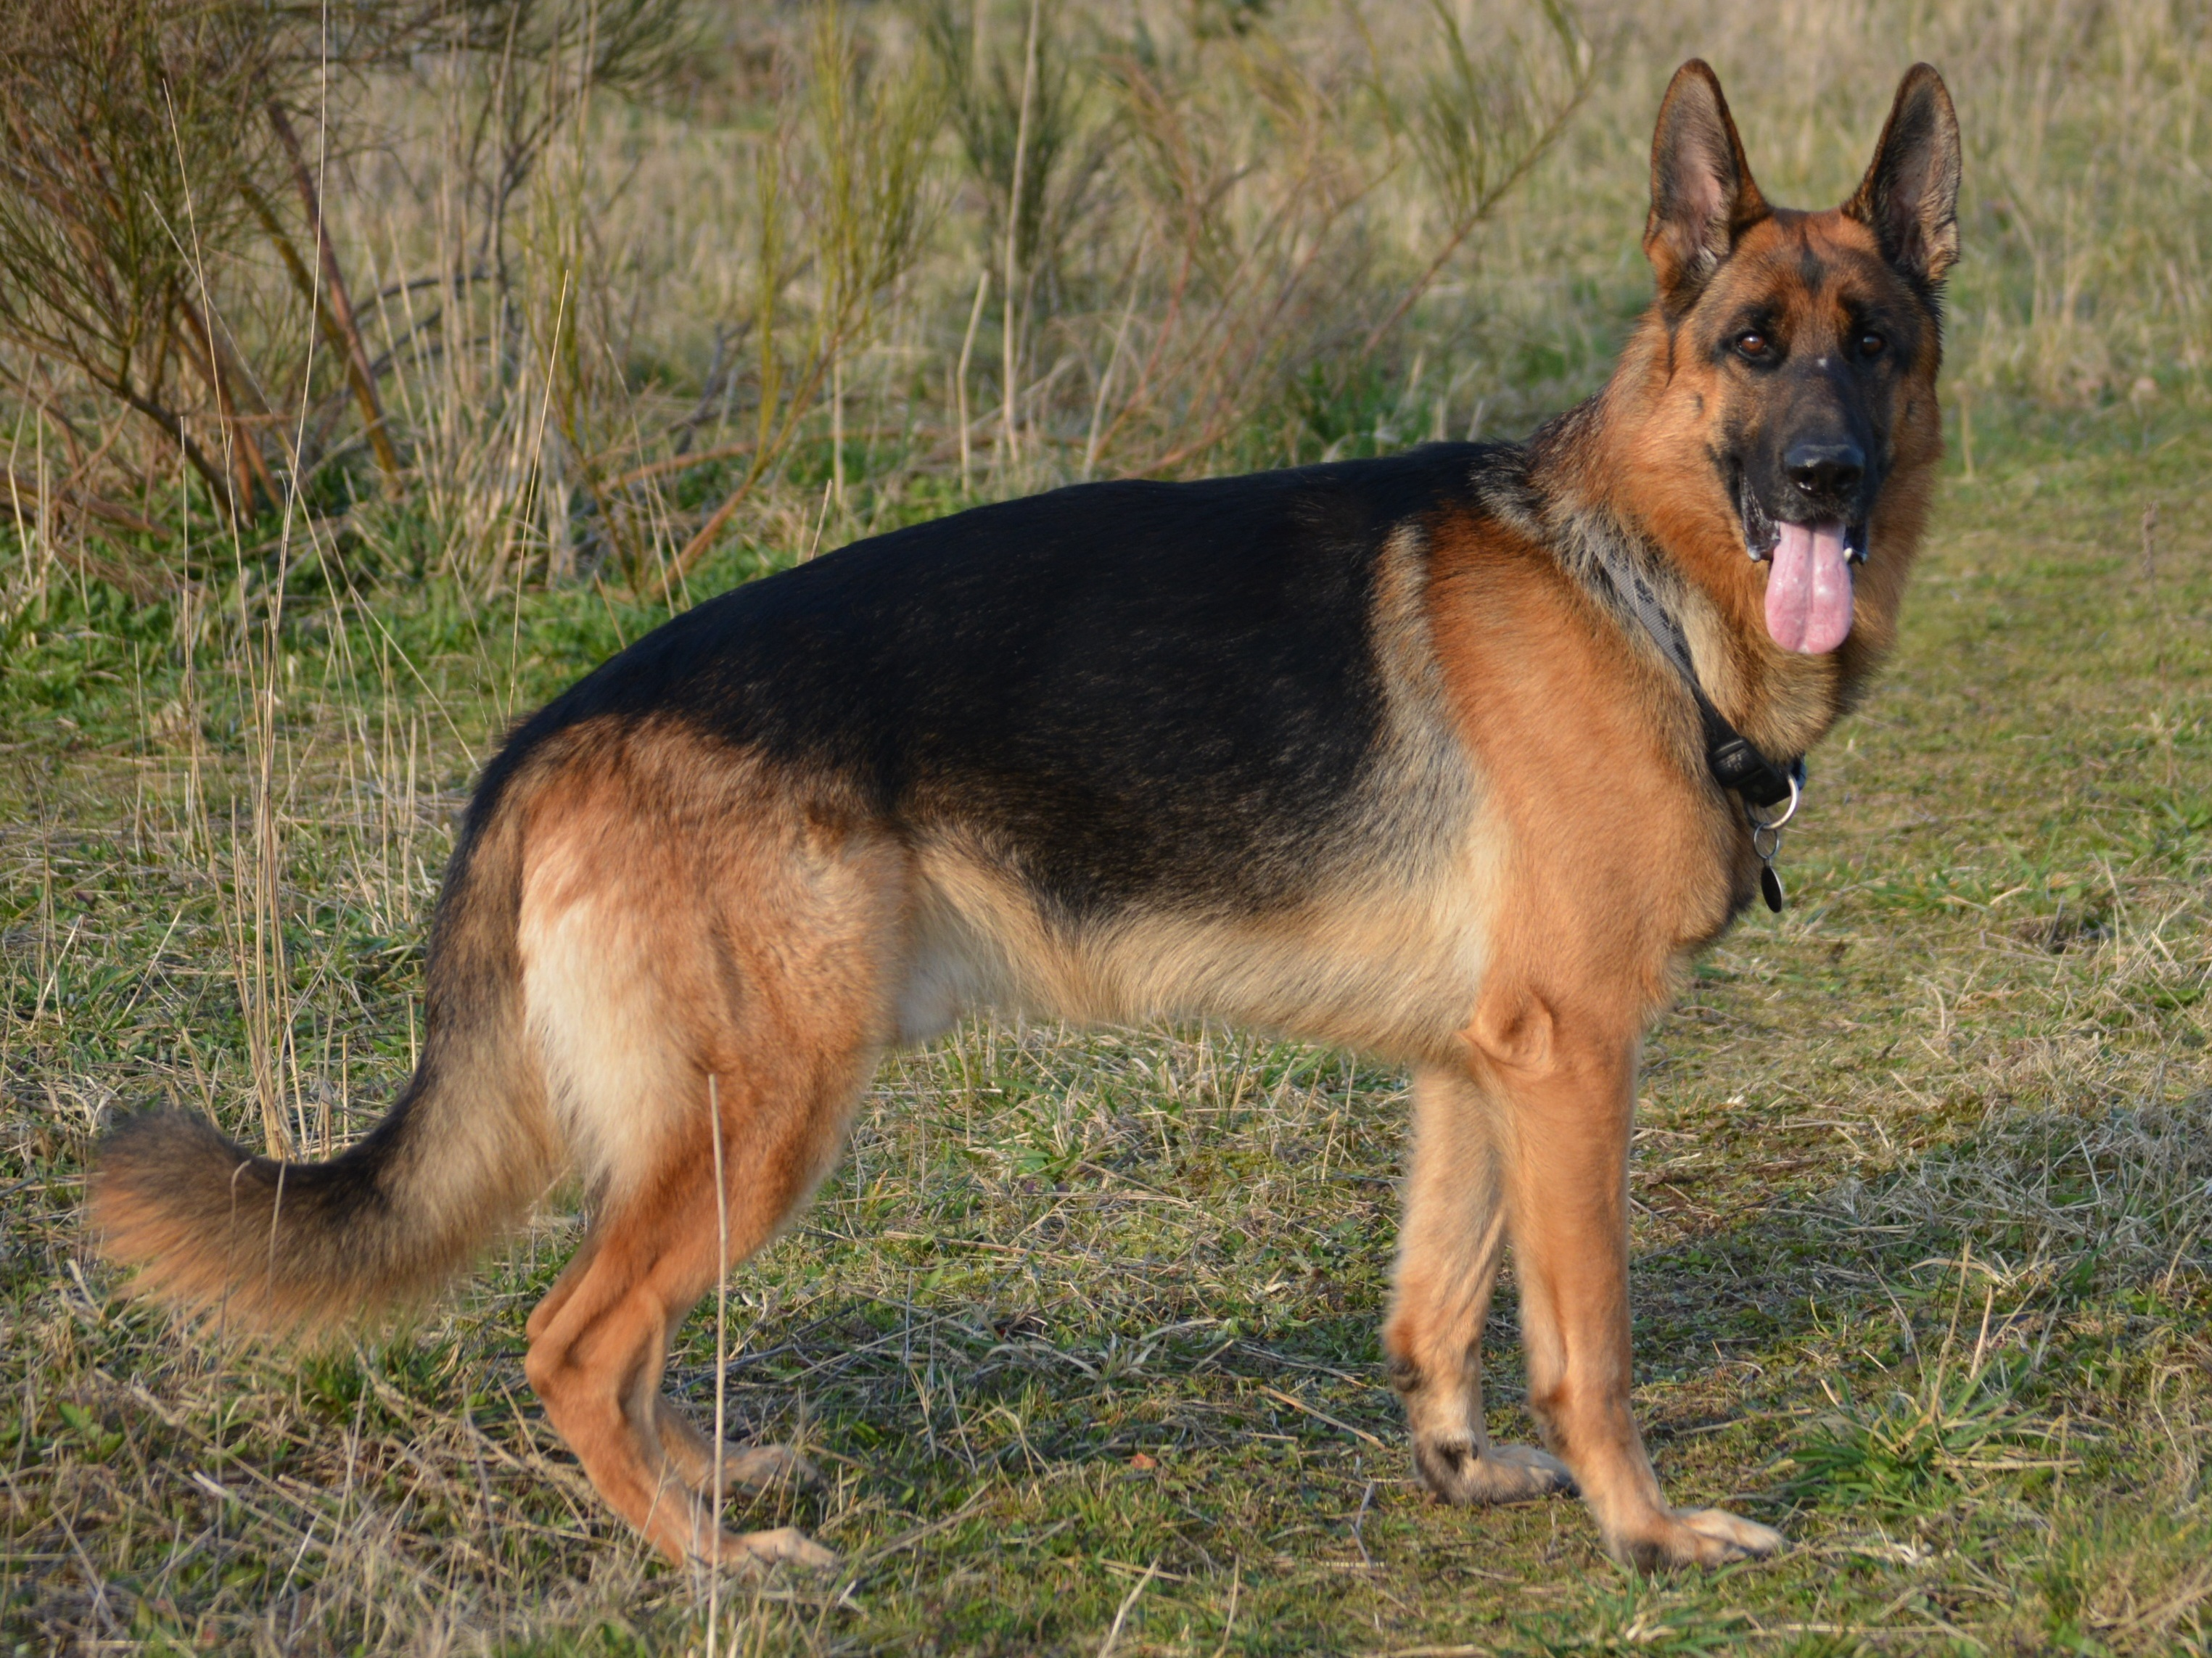

In [4]:
Image(data='https://upload.wikimedia.org/wikipedia/commons/4/4f/German-shepherd-4040871920._%282%29.jpg') 

In [5]:
preprocessed_image = prepare_image(get_file('German-shepperd.jpg',origin='https://upload.wikimedia.org/wikipedia/commons/4/4f/German-shepherd-4040871920._%282%29.jpg'))
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n02106662', 'German_shepherd', 0.99881303),
  ('n02105162', 'malinois', 0.0005058526),
  ('n02096294', 'Australian_terrier', 0.000152692),
  ('n02088466', 'bloodhound', 0.00013338483),
  ('n02112706', 'Brabancon_griffon', 5.550596e-05)]]

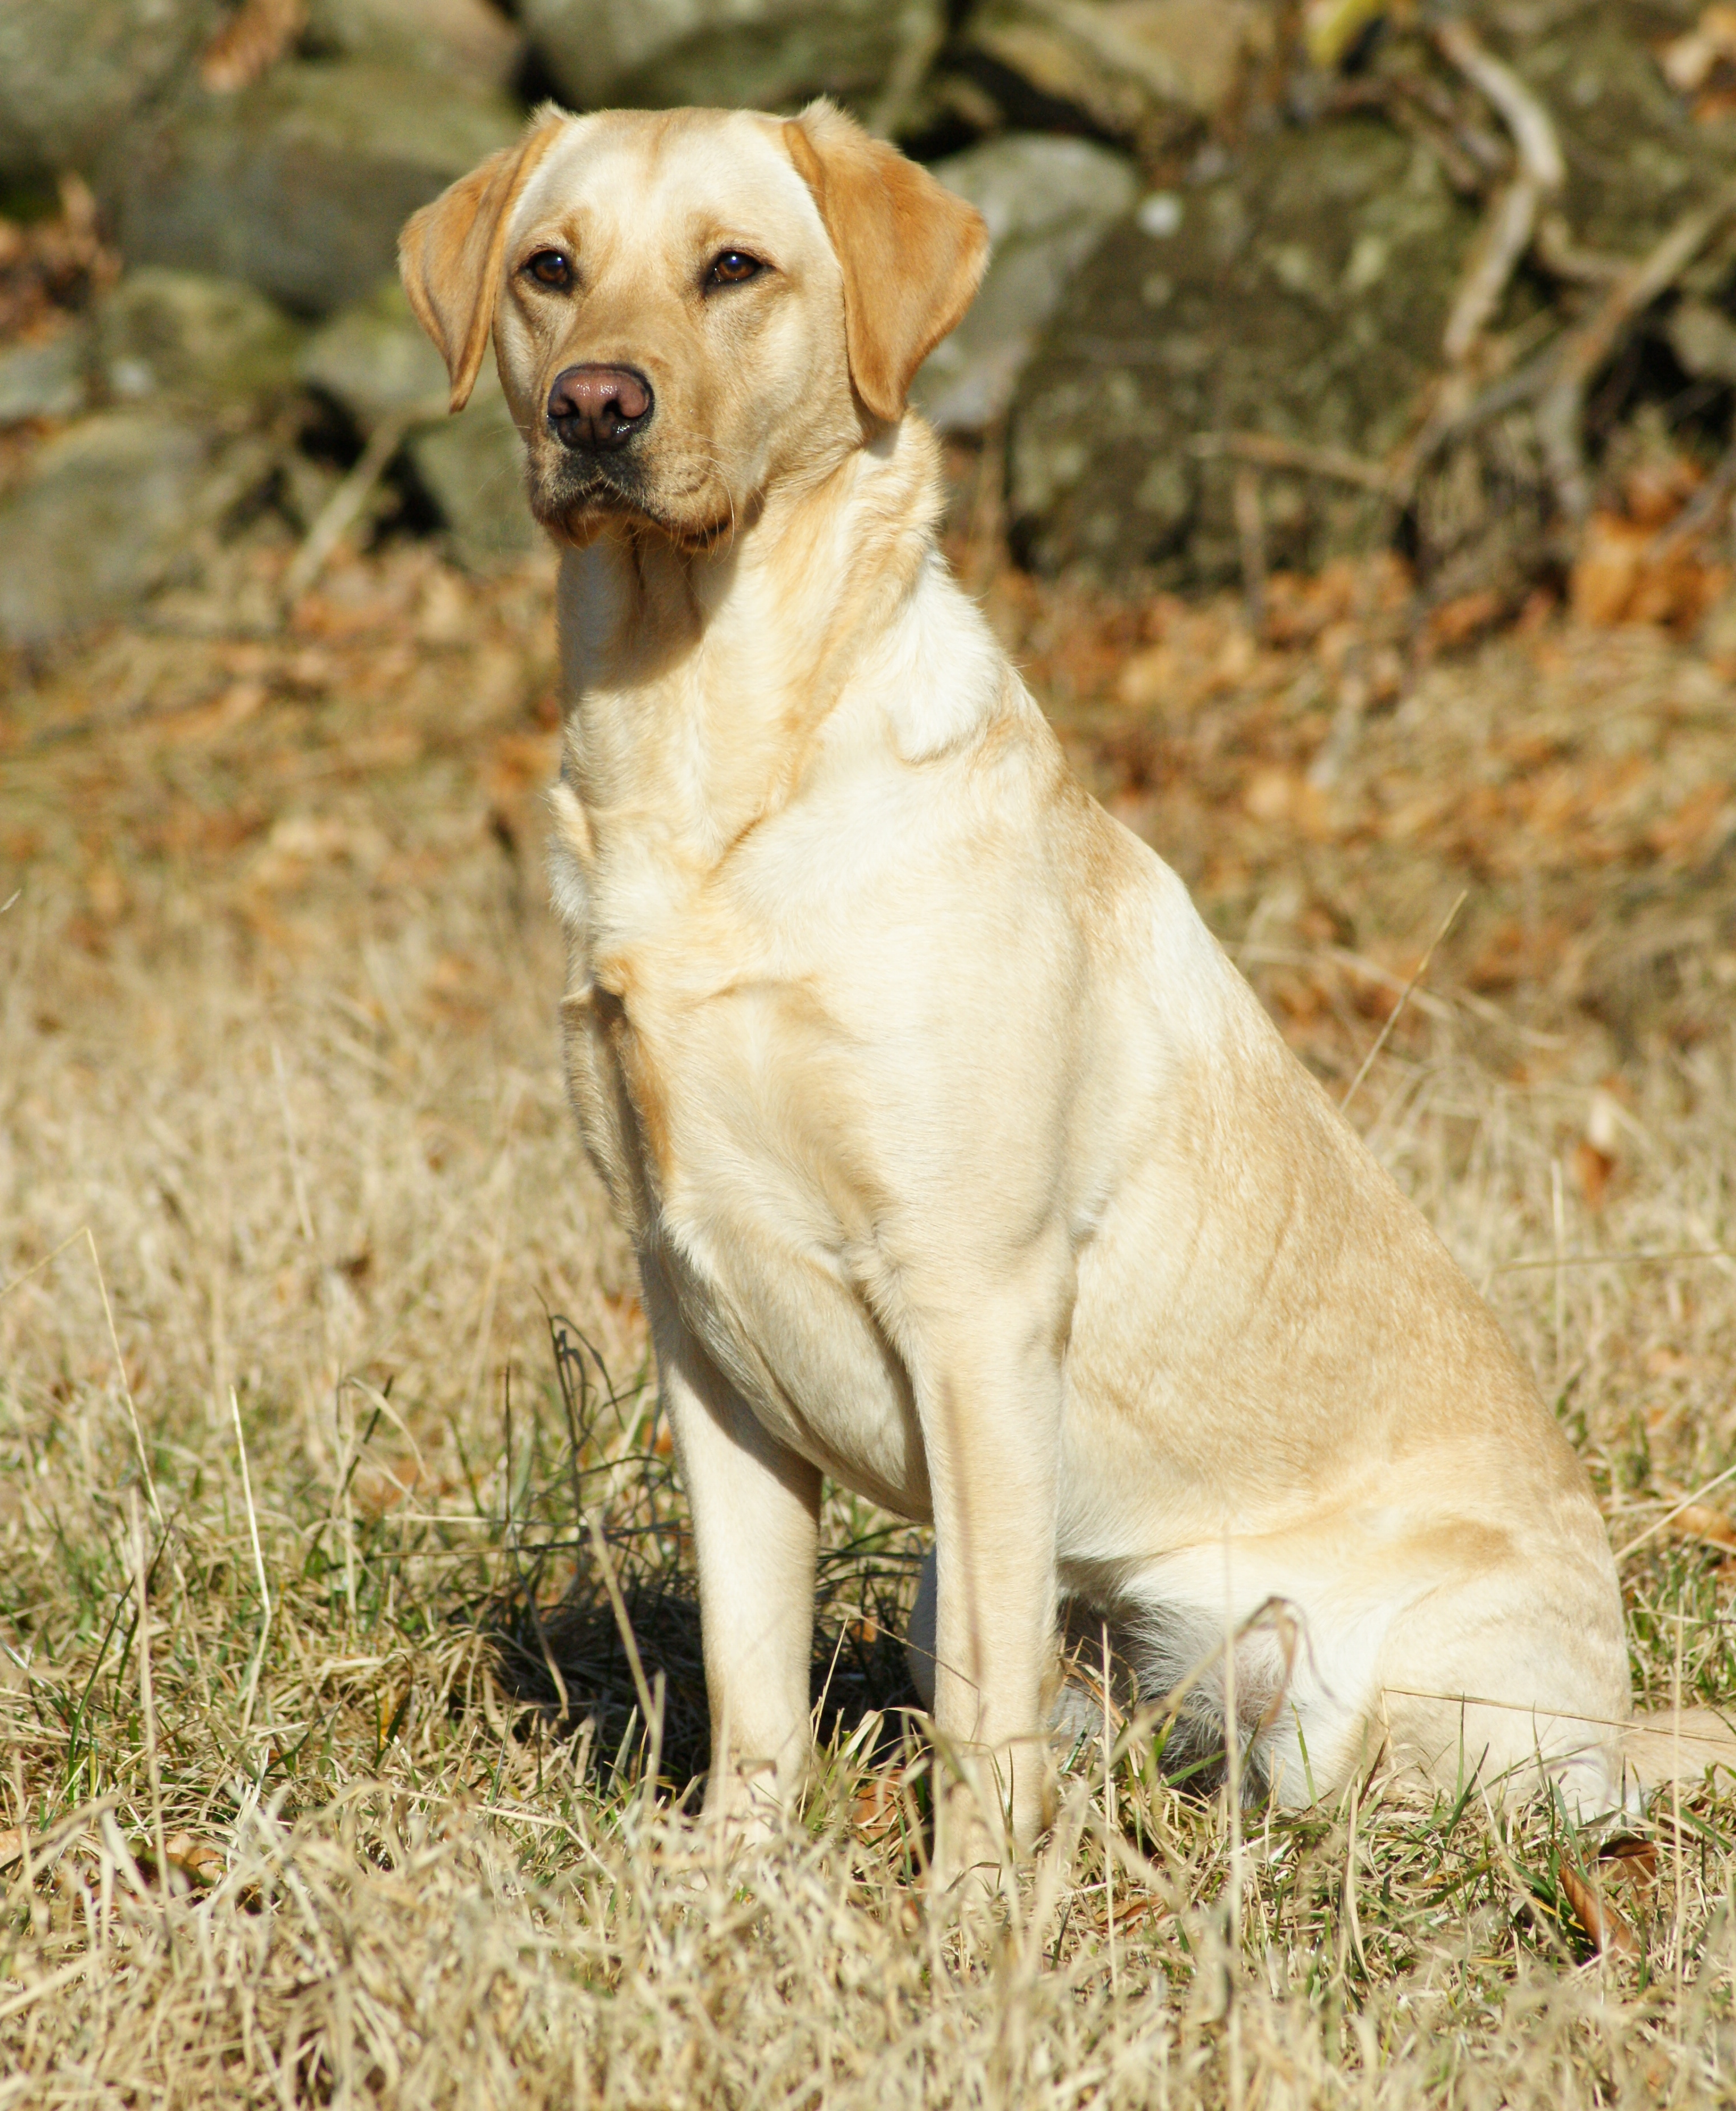

In [6]:
Image(data='https://upload.wikimedia.org/wikipedia/commons/d/d4/Labrador_Retriever_-_Yellow.JPG')

In [7]:
preprocessed_image = prepare_image(get_file('Labrador.jpg',origin='https://upload.wikimedia.org/wikipedia/commons/d/d4/Labrador_Retriever_-_Yellow.JPG'))
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 47ms/step


[[('n02099712', 'Labrador_retriever', 0.98812824),
  ('n02099601', 'golden_retriever', 0.009261234),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0007748636),
  ('n02101388', 'Brittany_spaniel', 0.00074964104),
  ('n02087394', 'Rhodesian_ridgeback', 0.0003443818)]]

It works pretty well, you can try here some different pictures if you're curious.

## TODO - test on Traffic signs

Now let's test the network on some images of traffic signs. We will work with `Stop`, `Speedlimit` and `Crosswalk`.
Please use the code above as a template and try to find some images of the traffic signs and test the network on it.

In [10]:
preprocessed_image = prepare_image(get_file('dopravni_znacka.jpg',origin='https://cdn.myshoptet.com/usr/www.dopravniznacky.online/user/shop/big/5181_dopravni-znacka-e2b-tvar-krizovatky.jpg'))
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 45ms/step


[[('n03532672', 'hook', 0.65062296),
  ('n02840245', 'binder', 0.1186184),
  ('n03376595', 'folding_chair', 0.060751386),
  ('n04239074', 'sliding_door', 0.03935642),
  ('n04501370', 'turnstile', 0.019663682)]]

In [11]:
preprocessed_image = prepare_image(get_file('znacka_hracka.jpg',origin='https://www.bambule.cz/data/cache/thumb_900-900-12/products/8262/43302be7a7b7a6e2b51a40eb8f0a18fa/114584.jpg'))
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 70ms/step


[[('n04380533', 'table_lamp', 0.6280459),
  ('n02843684', 'birdhouse', 0.10998036),
  ('n02708093', 'analog_clock', 0.056975715),
  ('n03637318', 'lampshade', 0.052928723),
  ('n06794110', 'street_sign', 0.040748853)]]

In [17]:
preprocessed_image = prepare_image(get_file('stop.jpg',origin='https://www.lincoln.ne.gov/files/sharedassets/public/ltu/transportation/traffic-engineering/stop-sign.jpg'))
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

1/1 [==============================] - 0s 50ms/step


[[('n06794110', 'street_sign', 0.97188514),
  ('n03976657', 'pole', 0.0040063774),
  ('n02782093', 'balloon', 0.0029557606),
  ('n03127747', 'crash_helmet', 0.0019405028),
  ('n03891332', 'parking_meter', 0.0017766947)]]

## Create traffic sign dataset

Lets now manipulate MobileNet top few layers and employ transfer learning. To do this, we need to train it on some images. We will train it on `Stop`, `Speedlimit` and `Crosswalk` traffic signs. But instead of manually downloading images of them, let's use Google Image Search and pull the images.

In [18]:
! pip install simple_image_download

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done


In [19]:
from simple_image_download import simple_image_download as simp

In [20]:
response = simp.simple_image_download

In [21]:
response().download('stop traffic sign', 150)

HTTPSConnectionPool(host='www.trafficconesforless.com', port=443): Max retries exceeded with url: /images/PO/X-R1-xx-Stop-Sign.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))
HTTPSConnectionPool(host='www.trafficconesforless.com', port=443): Max retries exceeded with url: /images/PO/X-R1-xx-Stop-Sign.png (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))


In [22]:
response().download('maximum speed traffic sign', 150)

HTTPSConnectionPool(host='www.trafficconesforless.com', port=443): Max retries exceeded with url: /images/PO/MUTCD_SPEEDLIMIT30-01.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))
HTTPSConnectionPool(host='www.trafficconesforless.com', port=443): Max retries exceeded with url: /images/PO/MUTCD_SPEEDLIMIT30-01.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))


In [23]:
response().download('crosswalk traffic sign', 150)

Check size of the images and remove the ones with low quality

In [24]:
import os
from PIL import Image

def check_pictures(directory):
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        try:
            img = Image.open(f)
            wid, hgt = img.size
            if wid < 300 or hgt < 300:
                os.remove(f)
        except:
            os.remove(f)
        

            
check_pictures("simple_images/stop traffic sign")
check_pictures("simple_images/maximum speed traffic sign")
check_pictures("simple_images/crosswalk traffic sign")

## Prepare model

Let's now use MobileNet, freeze the base layers and let's add and train the top few layers.

In [25]:
base_model = MobileNet(weights='imagenet',include_top=False) # imports the mobilenet model and discards the last layer.

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x) # we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(1024,activation='relu')(x) # dense layer 2
x = Dense(512,activation='relu')(x) # dense layer 3
preds = Dense(3,activation='softmax')(x) # final layer with softmax activation (this gives us probability), 3 outputs for 3 labels

17225924/17225924 [==============================] - 0s 0us/step


In [26]:
model = Model(inputs=base_model.input,outputs=preds)

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

We will use pre-trained weights as the model has been trained already on the ImageNet dataset. We ensure all the weights are non-trainable, we will only train the last few layers.

In [28]:
for layer in model.layers[:80]:
    layer.trainable = False
for layer in model.layers[80:]:
    layer.trainable = True

Now lets load the training data into the ImageDataGenerator. Specify path, and it automatically sends the data for training in batches, simplifying the code.

In [29]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

batch_size = 32

train_generator = datagen.flow_from_directory('simple_images',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')
validation_generator = datagen.flow_from_directory('simple_images',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 242 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


Now let's do the real training

In [30]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(train_generator,
                    steps_per_epoch=train_generator.n // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // batch_size,
                    epochs=5)


Epoch 1/5
5/7 [====================>.........] - ETA: 3s - loss: 1.6561 - accuracy: 0.4863

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 [==============================] - 18s 2s/step - loss: 1.3743 - accuracy: 0.5571 - val_loss: 1.1989 - val_accuracy: 0.5938
Epoch 2/5
7/7 [==============================] - 14s 2s/step - loss: 0.2394 - accuracy: 0.9095 - val_loss: 3.3431 - val_accuracy: 0.4688
Epoch 3/5
7/7 [==============================] - 15s 2s/step - loss: 0.0847 - accuracy: 0.9643 - val_loss: 3.4768 - val_accuracy: 0.5938
Epoch 4/5
7/7 [==============================] - 14s 2s/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 1.5686 - val_accuracy: 0.6875
Epoch 5/5
7/7 [==============================] - 13s 2s/step - loss: 0.0448 - accuracy: 0.9952 - val_loss: 4.0578 - val_accuracy: 0.4688


## TODO test the model

Model is now trained. Now let's test some other input images to check the predictions.

In [40]:
preprocessed_image = prepare_image(get_file('maxsign.jpg',origin='https://www.shutterstock.com/image-illustration/illustration-40-kmh-speed-limit-260nw-1393036127.jpg'))
predictions = model.predict(preprocessed_image)
predictions

1/1 [==============================] - 0s 81ms/step


array([[9.2808356e-14, 1.0000000e+00, 1.4568097e-12]], dtype=float32)

In [41]:
preprocessed_image = prepare_image(get_file('prechod.jpg',origin='https://www.zakruta.cz/img/dopravni-znacky/velke/IP6.jpg'))
predictions = model.predict(preprocessed_image)
predictions

1/1 [==============================] - 0s 52ms/step


array([[2.7973449e-05, 9.9939847e-01, 5.7358039e-04]], dtype=float32)

In [32]:
# see which label corresponds to which class
validation_generator.class_indices

{'crosswalk traffic sign': 0,
 'maximum speed traffic sign': 1,
 'stop traffic sign': 2}